# Ejercicio 1

Se le brinda una serie de datos los cuales debe de agrupar utilizando los métodos conocidos de agrupamiento.

- Agrupamiento por particiones (K-means++, MiniBatchKMeans)
- Agrupamiento jerárquico
- Agrupamiento espectral

In [176]:
import time
import warnings
from itertools import cycle, islice
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering, KMeans, MiniBatchKMeans
from sklearn.datasets import make_blobs, make_s_curve
from scipy import stats
import time
import warnings
from itertools import cycle, islice


# use seaborn plotting defaults
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")


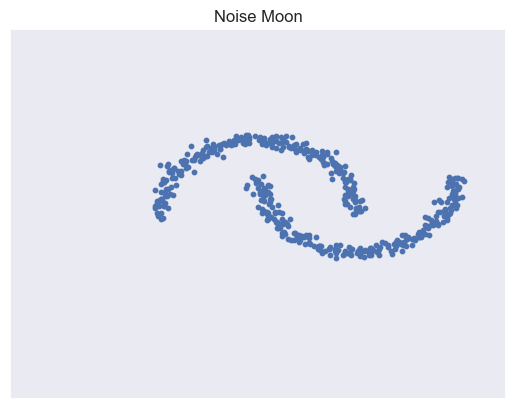

In [2]:
n_samples = 500
seed = 30
noisy_moons = datasets.make_moons(n_samples=n_samples, 
                                  noise=0.05, 
                                  random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

plt.figure()
X, y = noisy_moons
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.title("Noise Moon")
plt.show()

## Agrupamiento por particiones (K-means ++, MiniBatchKMeans)

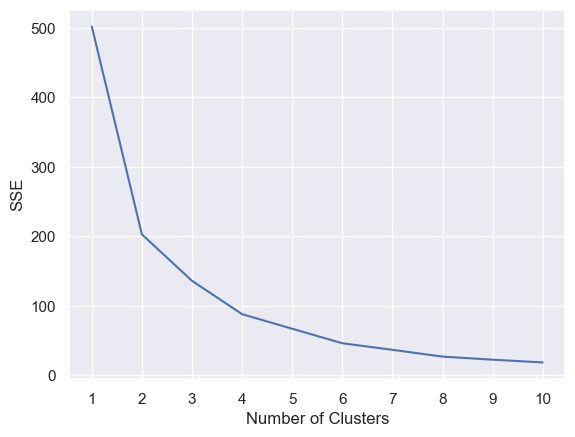

In [3]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

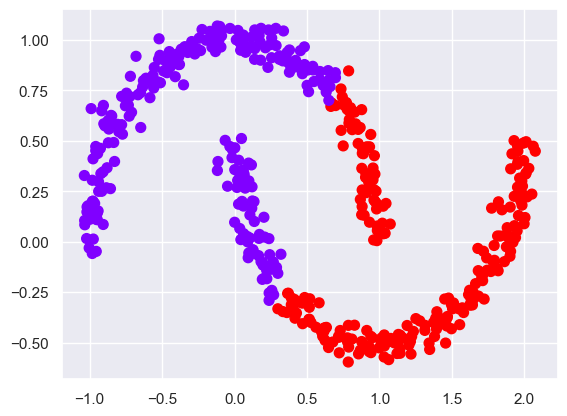

In [12]:
n_cluster = 2 #TODO
kmeans = KMeans(n_cluster, max_iter = 1)

kmeans.fit(X)  #TODO
y_kmeans = kmeans.predict(X) #TODO
plt.scatter(X[:, 0], X[:, 1] , c=y_kmeans, s=50, cmap='rainbow') #TODO

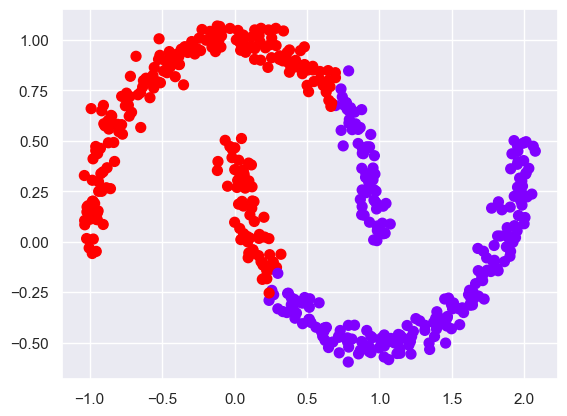

In [11]:
n_cluster = 2 #TODO
params = 42
kmeans_mb = cluster.MiniBatchKMeans(
        n_clusters=n_cluster,
        n_init="auto",
        random_state=params,
    )

kmeans_mb.fit(X) #TODO
y_kmeans = kmeans_mb.predict(X) #TODO
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow') #TODO

## Agrupamiento jerárquico

In [13]:
cluster = AgglomerativeClustering(n_clusters=2, 
                                  affinity='euclidean', 
                                  linkage='ward') #TODO
cluster = cluster.fit(X) #TODO

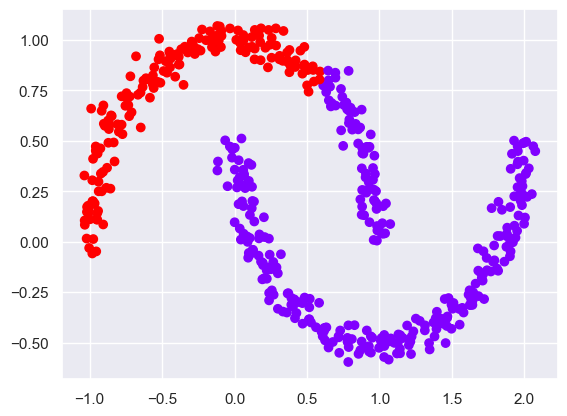

In [21]:

plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, cmap='rainbow') #TODO

## Agrupamiento espectral

In [17]:
sc = SpectralClustering(
        n_clusters=2,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params,
    ) #TODO

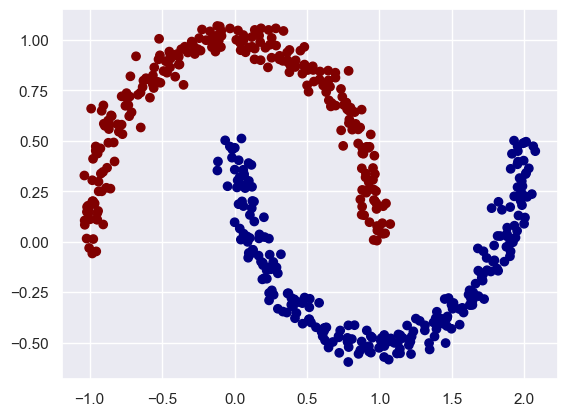

In [19]:
sc_clustering = sc.fit(X) #TODO
plt.scatter(X[:, 0], X[:, 1], c=sc_clustering.labels_, cmap='jet') #TODO

In [77]:
n_samples = 500
seed = 30
n_cluster = 2
algoritmos = {
    "KMeans": KMeans(n_cluster, max_iter=500),
    "KmeansMB": cluster.MiniBatchKMeans(
        n_clusters=n_cluster, n_init="auto", random_state=42, batch_size = 50
    ),
    "AC": AgglomerativeClustering(
        n_clusters=n_cluster, affinity="euclidean", linkage="ward"
    ),
    "SC": SpectralClustering(
        n_clusters=n_cluster,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=42,
    ),
}
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

X, y = noisy_moons

In [78]:

def comparacion(X,algoritmos):
    fig,axs = plt.subplots(2,2)
    
    for ax,(clave,valor) in zip(axs.ravel(),algoritmos.items()):
        valor.fit(X) 
        
        if clave == 'AC' or clave =='SC':
            y=valor.labels_
        else:
            y = valor.predict(X)
        ax.set_title(clave)  # Agrega un título al gráfico
        
    
        ax.scatter(X[:, 0], X[:, 1], c = y, s=50, cmap='rainbow')
    

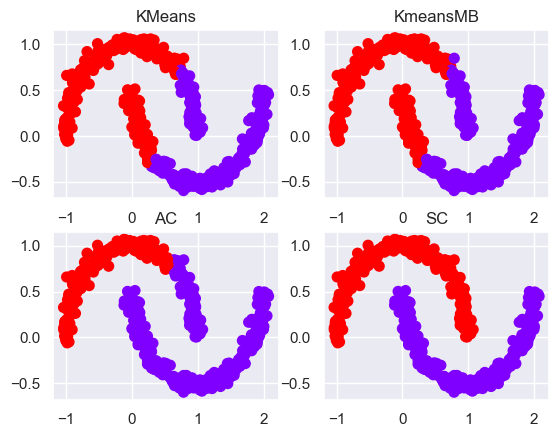

In [79]:
comparacion(X,algoritmos)

# Ejercicio 2

Se le brinda una serie de datos los cuales debe de agrupar utilizando los métodos conocidos de agrupamiento.

- Agrupamiento por particiones (K-means++, MiniBatchKMeans)
- Agrupamiento jerárquico
- Agrupamiento espectral

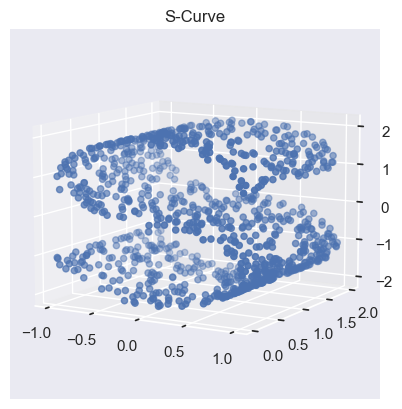

In [80]:
n_samples = 500
seed = 30
X, y = make_s_curve(n_samples=1000)
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2])
ax.view_init(10, -60)
plt.title("S-Curve")
plt.show()


## Agrupamiento por particiones (K-means ++, MiniBatchKMeans)

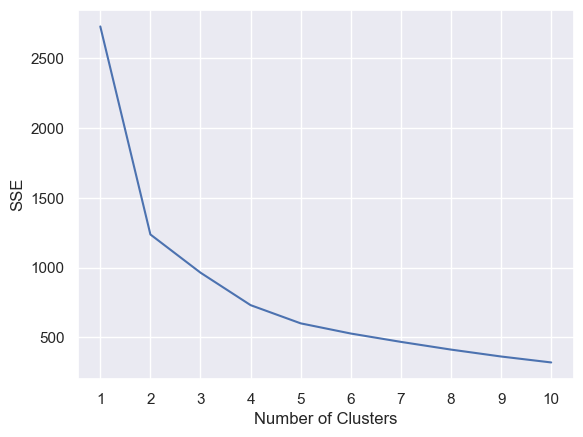

In [81]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

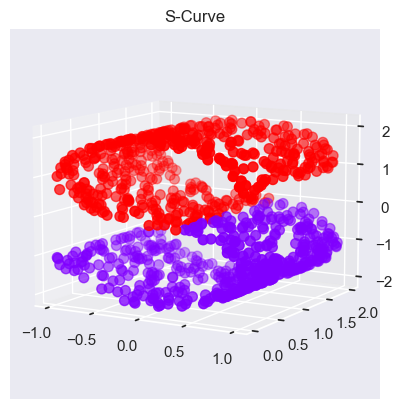

In [82]:
n_cluster = 2  #TODO
kmeans = KMeans(n_cluster, max_iter = 1)

kmeans.fit(X) #TODO
y_kmeans = kmeans.predict(X) #TODO
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1],X[:, 2], c=y_kmeans, s=50, cmap='rainbow') #TODO - Aquí una pequeña trampa, se encuentran operando en 3 dimensiones
ax.view_init(10, -60)
plt.title("S-Curve")
plt.show()

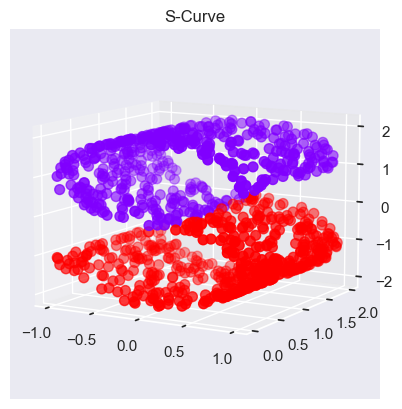

In [85]:
n_cluster = 2  #TODO
kmeans_mb = cluster.MiniBatchKMeans(
        n_clusters=n_cluster,
        n_init="auto",
        random_state=42,
        batch_size = 50
    )

kmeans_mb.fit(X) #TODO
y_kmeans = kmeans_mb.predict(X) #TODO
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1],X[:, 2], c=y_kmeans, s=50, cmap='rainbow') #TODO
ax.view_init(10, -60)
plt.title("S-Curve")
plt.show()

## Agrupamiento jerárquico

In [86]:
cluster = AgglomerativeClustering(n_clusters=n_cluster, 
                                  affinity='euclidean', 
                                  linkage='ward') #TODO
cluster = cluster.fit(X)

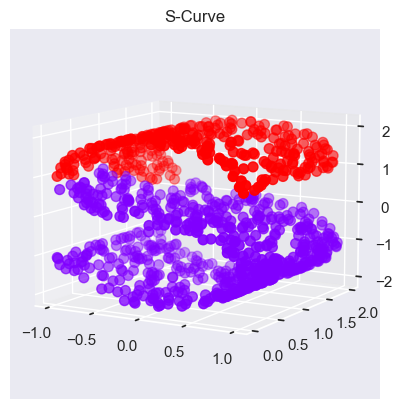

In [88]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1],X[:, 2], c=cluster.labels_, s=50, cmap='rainbow') #TODO
ax.view_init(10, -60)
plt.title("S-Curve")
plt.show()

## Agrupamiento espectral

In [90]:
sc = SpectralClustering(
        n_clusters=n_cluster,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=42,
    ) #TODO

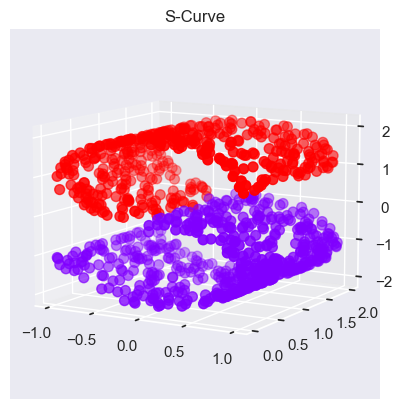

In [91]:
sc_clustering = sc.fit(X) #TODO
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1],X[:, 2], c=sc_clustering.labels_, s=50, cmap='rainbow') #TODO
ax.view_init(10, -60)
plt.title("S-Curve")
plt.show()

In [96]:
n_samples = 1000
n_cluster = 2
algoritmos = {
    "KMeans": KMeans(n_cluster, max_iter=500),
    "KmeansMB": MiniBatchKMeans(
        n_clusters=n_cluster, n_init="auto", random_state=42, batch_size = 50
    ),
    "AC": AgglomerativeClustering(
        n_clusters=n_cluster, affinity="euclidean", linkage="ward"
    ),
    "SC": SpectralClustering(
        n_clusters=n_cluster,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=42,
    ),
}
X, y = make_s_curve(n_samples=n_samples)

In [123]:
def comparacion_3D(X, algoritmos):
    fig = plt.figure(figsize=(10, 8))
    
    for i, (clave, valor) in enumerate(algoritmos.items(), start=1):
        ax = fig.add_subplot(2, 2, i, projection='3d')  # Agrega un subgráfico 3D
        valor.fit(X)
        
        if clave == 'AC' or clave =='SC':
            y = valor.labels_
        else:
            y = valor.predict(X)
        
        ax.set_title(clave)
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=50, cmap='rainbow')
       
    
    plt.tight_layout()
    plt.show()

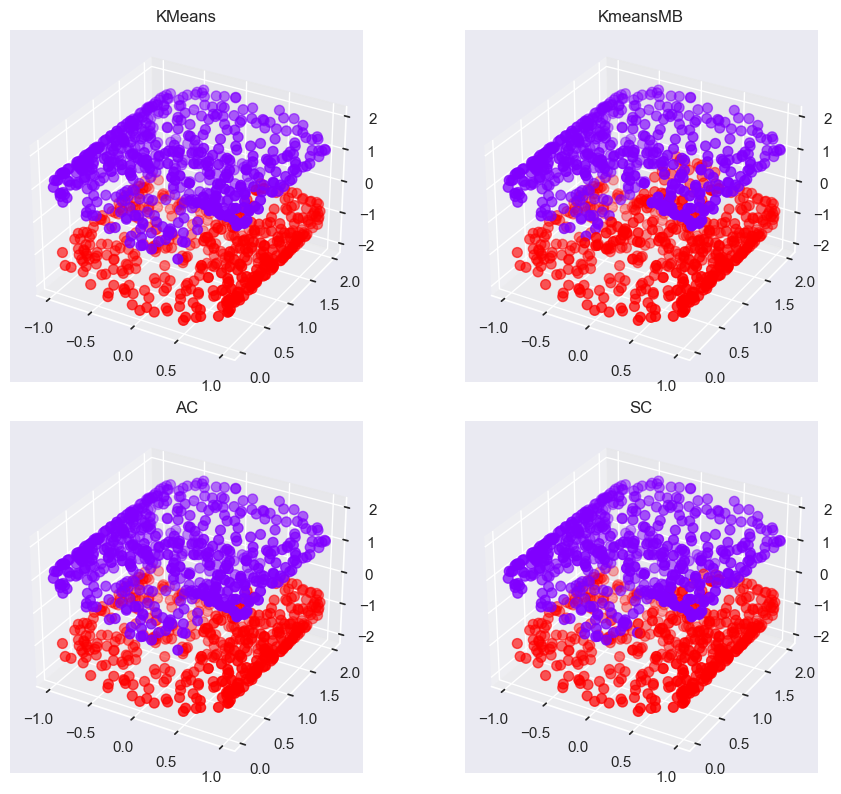

In [124]:
comparacion_3D(X,algoritmos)

# Ejercicio 3

Se te brinda un set de datos y debes de utilizar el mejor método de agrupamiento según tu criterio.

In [125]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= 0.5

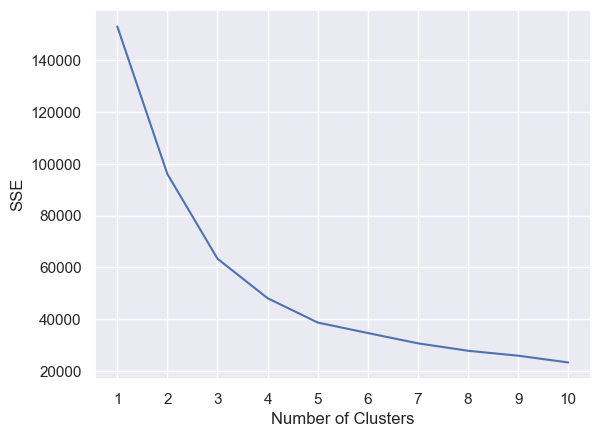

In [173]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

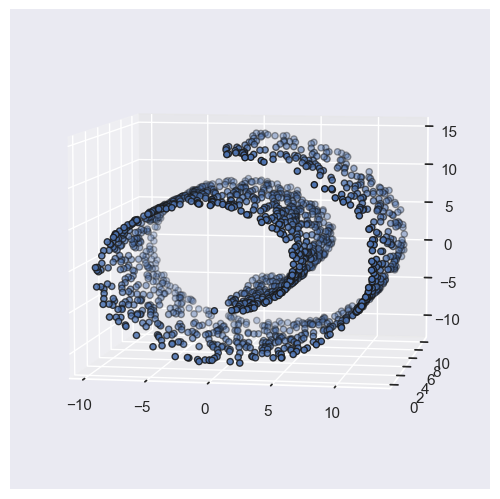

In [126]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
ax1.scatter(
        X[:, 0], X[:, 1], X[:, 2],
        s=20,
        edgecolor="k")

In [ ]:
sc = SpectralClustering(
        n_clusters=n_cluster,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=42,)

In [177]:
# Limpieza de datos: normalización.
normalizer = preprocessing.MinMaxScaler() #Normalización - Instanciamos normalizador
X_norm = normalizer.fit_transform(X) #Al normalizador le aplico el método fit_transform para poder normalizar los dat

In [183]:
n_cluster = 4
algoritmos ={
    "nearest_neighbors" : SpectralClustering(
        n_clusters=n_cluster,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=42,),
    "rbf":SpectralClustering(
        n_clusters=n_cluster,
        eigen_solver="arpack",
        affinity="rbf",
        random_state=42,),
    "laplacian":SpectralClustering(
        n_clusters=n_cluster,
        eigen_solver="arpack",
        affinity="laplacian",
        random_state=42,),
    "poly":SpectralClustering(
        n_clusters=n_cluster,
        eigen_solver="arpack",
        affinity="poly",
        random_state=42,),
}

In [178]:
def comparacion_3D(X, algoritmos):
    fig = plt.figure(figsize=(10, 8))
    
    for i, (clave, valor) in enumerate(algoritmos.items(), start=1):
        ax = fig.add_subplot(2, 2, i, projection='3d')  # Agrega un subgráfico 3D
        valor.fit(X)
        y = valor.labels_
        ax.set_title(clave)
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=50, cmap='rainbow')
       
    
    plt.tight_layout()
    plt.show()

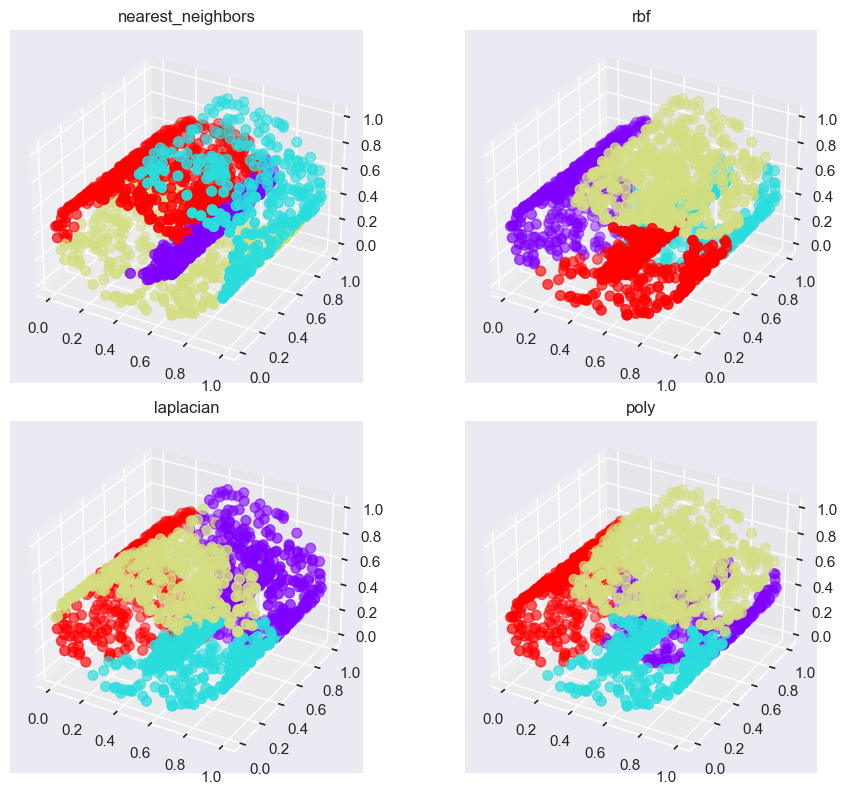

In [184]:
comparacion_3D(X_norm,algoritmos)